In [1]:
#load needed libaris
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import uproot
import pandas as pd
#import os
#import ROOT
#import time
import math

In [2]:
#define which file to read
inputdir = '/home/tmettler/'
filename = 'cases_ch.csv'

from datetime import datetime

dateparse = lambda x: datetime.strptime(x, '%d.%m.%Y')
#dateparse = lambda dates: [pd.datetime.strptime(d, '%d.%m.%Y') for d in dates]

df = pd.read_csv(inputdir+filename, parse_dates=['Date'], date_parser=dateparse)

headers = ['Date', 'cases', 'new' ]
dtypes = {'Date': 'str', 'cases': 'int', 'new': 'int'}
parse_dates = ['Date']
cases = pd.read_csv(inputdir+filename,dtype=dtypes, parse_dates=parse_dates)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
Date       243 non-null datetime64[ns]
cases      243 non-null int64
new        243 non-null int64
change     243 non-null float64
change2    243 non-null float64
ave        243 non-null float64
cum_ave    243 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 13.4 KB


In [4]:
cases.tail(1)

,Date,cases,new,change,change2,ave,cum_ave
242,2020-10-22,97019,5256,1.057278,0.939242,3671.714286,83053.428571


/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


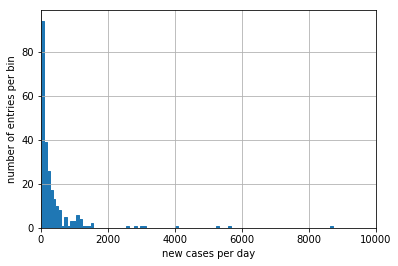

In [5]:
ax = cases['new'].plot.hist(\
    fill=True,histtype='step',grid='True',xlim=[0,10000],bins=100)
ax.set_xlabel('new cases per day')
ax.set_ylabel('number of entries per bin')
plt.show()

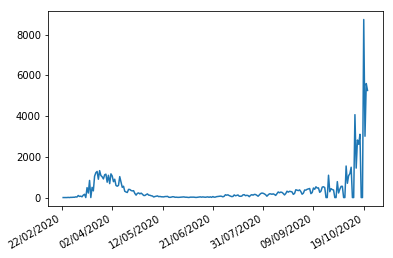

In [26]:
#plt.plot(cases['Date'],cases['new'])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))
plt.plot(df['Date'],df['new'])
plt.gcf().autofmt_xdate()

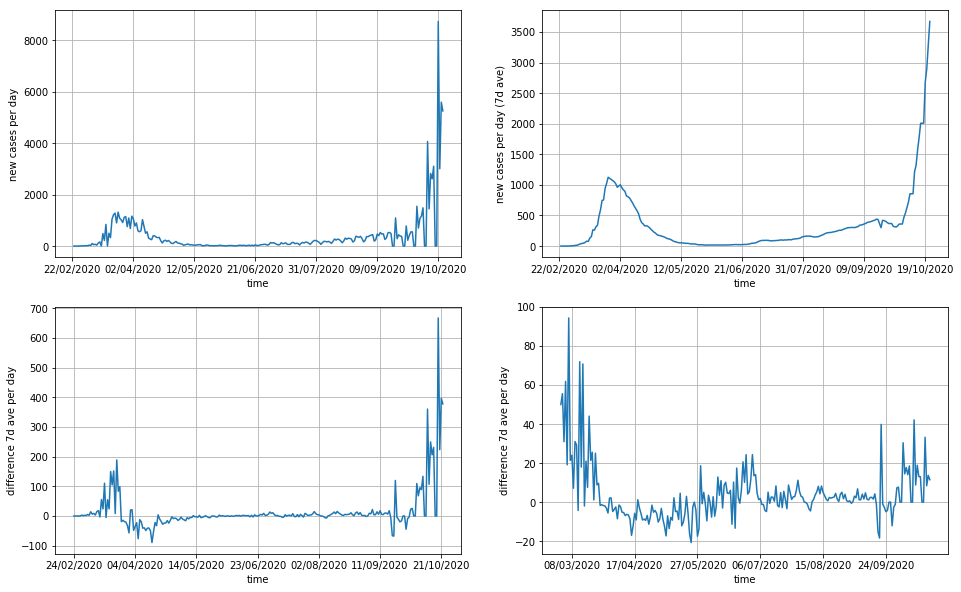

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs[0][0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
axs[0][0].xaxis.set_major_locator(mdates.DayLocator(interval=40))
#axs[0][0].autofmt_xdate()
axs[0][0].plot(df['Date'],df['new'])
axs[0][0].set_ylabel('new cases per day')
axs[0][0].set_xlabel('time')
axs[0][0].grid(True)

axs[0][1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
axs[0][1].xaxis.set_major_locator(mdates.DayLocator(interval=40))
axs[0][1].plot(df['Date'],(df['ave']))
axs[0][1].set_ylabel('new cases per day (7d ave)')
axs[0][1].set_xlabel('time')
axs[0][1].grid(True)
#plt.gcf().autofmt_xdate()

axs[1][0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
axs[1][0].xaxis.set_major_locator(mdates.DayLocator(interval=40))
axs[1][0].plot(df['Date'],(df['ave'].diff()))
axs[1][0].set_ylabel('difference 7d ave per day')
axs[1][0].set_xlabel('time')
axs[1][0].grid(True)

axs[1][1].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
axs[1][1].xaxis.set_major_locator(mdates.DayLocator(interval=40))
axs[1][1].plot(df['Date'],(df['ave'].pct_change()*100))
axs[1][1].set_ylabel('difference 7d ave per day')
axs[1][1].set_xlabel('time')
axs[1][1].grid(True)

In [132]:
def put_restriction(plot):
    plot.axvline('2020-04-27', linewidth=1, color='g') #öffnung Coiffeur, Bau, Garten
    plot.axvline('2020-05-11', linewidth=1, color='g') #öffnung Schulen, läden, Restaurant
    plot.axvline('2020-06-06', linewidth=1, color='g') #öffnung bis 30 personen (5 vorher), veranstalltungen 300, Disco
    plot.axvline('2020-06-15', linewidth=1, color='g') #öffnung grenzen nachbarländer
    plot.axvline('2020-06-22', linewidth=1, color='g') #öffnung >30 Personen, komplete lockerungen sommer
    plot.axvline('2020-10-01', linewidth=1, color='g') #öffnung Grossveranstalltungen

    plot.axvline('2020-02-28', linewidth=1, color='r') #Besondere lager, <1000 cancle fasnacht
    plot.axvline('2020-03-01', linewidth=1, color='r') #Abstand halten
    plot.axvline('2020-03-13', linewidth=1, color='r') #schulschliessung, 50 personen in bars
    plot.axvline('2020-03-16', linewidth=1, color='r') #ausserordentliche lage, laden schliessung, reisebeschränkungen ->lockdown
    plot.axvline('2020-03-20', linewidth=1, color='r') #weniger als 5 personen
    plot.axvline('2020-07-06', linewidth=1, color='r') #Masken pflicht öV

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log


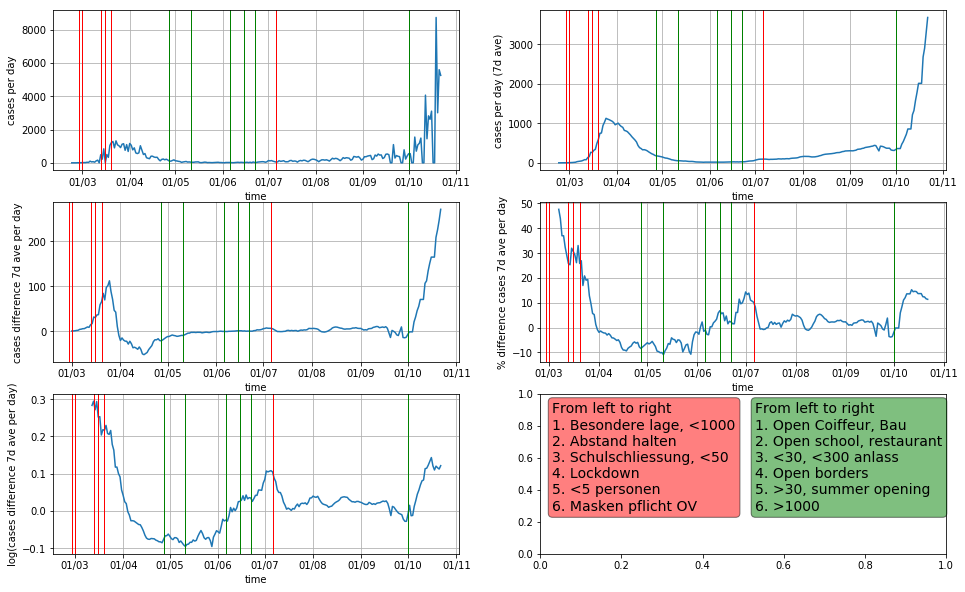

In [163]:
fig, axs = plt.subplots(3, 2, figsize=(16, 10))

axs[0][0].plot(df['Date'],df['new'])
axs[0][0].set_ylabel('cases per day')
axs[0][0].set_xlabel('time')

axs[0][1].plot(df['Date'],(df['ave']))
axs[0][1].set_ylabel('cases per day (7d ave)')
axs[0][1].set_xlabel('time')

axs[1][0].plot(df['Date'],(df['ave'].diff().rolling(7).sum()/7))
axs[1][0].set_ylabel('cases difference 7d ave per day')
axs[1][0].set_xlabel('time')

axs[1][1].plot(df['Date'],(df['ave'].pct_change().rolling(7).sum()/7*100))
axs[1][1].set_ylabel('% difference cases 7d ave per day')
axs[1][1].set_xlabel('time')

axs[2][0].plot(df['Date'],np.log((df['ave'])).diff().rolling(12).sum()/12)
axs[2][0].set_ylabel('log(cases difference 7d ave per day)')
axs[2][0].set_xlabel('time')

put_restriction(axs[2][0])
axs[2][0].grid(True)
axs[2][0].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))

textstr = '\n'.join((
    r'From left to right',
    r'1. Besondere lage, <1000',
    r'2. Abstand halten',
    r'3. Schulschliessung, <50',
    r'4. Lockdown',
    r'5. <5 personen',
    r'6. Masken pflicht OV'))
props = dict(boxstyle='round', facecolor='r', alpha=0.5)
axs[2][1].text(0.03, 0.95, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

textstr = '\n'.join((
    r'From left to right',
    r'1. Open Coiffeur, Bau',
    r'2. Open school, restaurant',
    r'3. <30, <300 anlass',
    r'4. Open borders',
    r'5. >30, summer opening',
    r'6. >1000'))
props = dict(boxstyle='round', facecolor='g', alpha=0.5)
axs[2][1].text(0.53, 0.95, textstr, fontsize=14,
        verticalalignment='top', bbox=props)



for i in range(2):
    for j in range(2):
        put_restriction(axs[i][j])
        axs[i][j].grid(True)
        axs[i][j].xaxis.set_major_formatter(mdates.DateFormatter('%d/%m'))
        #axs[i][j].xaxis.set_major_locator(mdates.DayLocator(interval=20))

fig.savefig('test.pdf')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


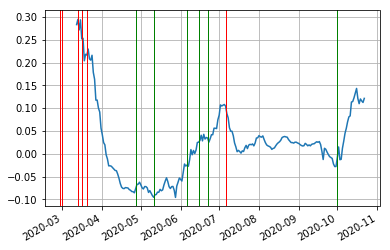

In [135]:
plt.plot(df['Date'],np.log((df['ave'])).diff().rolling(12).sum()/12)
plt.grid(True)
plt.gcf().autofmt_xdate()
put_restriction(plt)

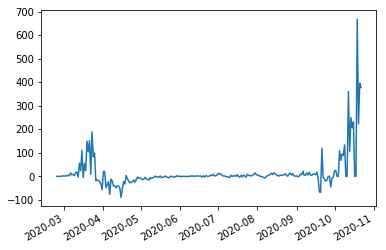

In [55]:
plt.plot(df['Date'],(df['ave'].diff()))
plt.gcf().autofmt_xdate()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


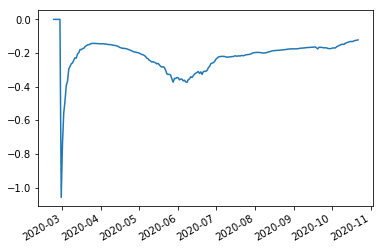

In [14]:
plt.plot(df['Date'],-1/np.log(df['ave']))
plt.gcf().autofmt_xdate()